<a href="https://colab.research.google.com/github/GaetanRigaut/titanic/blob/main/ML_Quest_Logistic_regression_Titanic_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [36]:
df_titanic.dtypes


Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


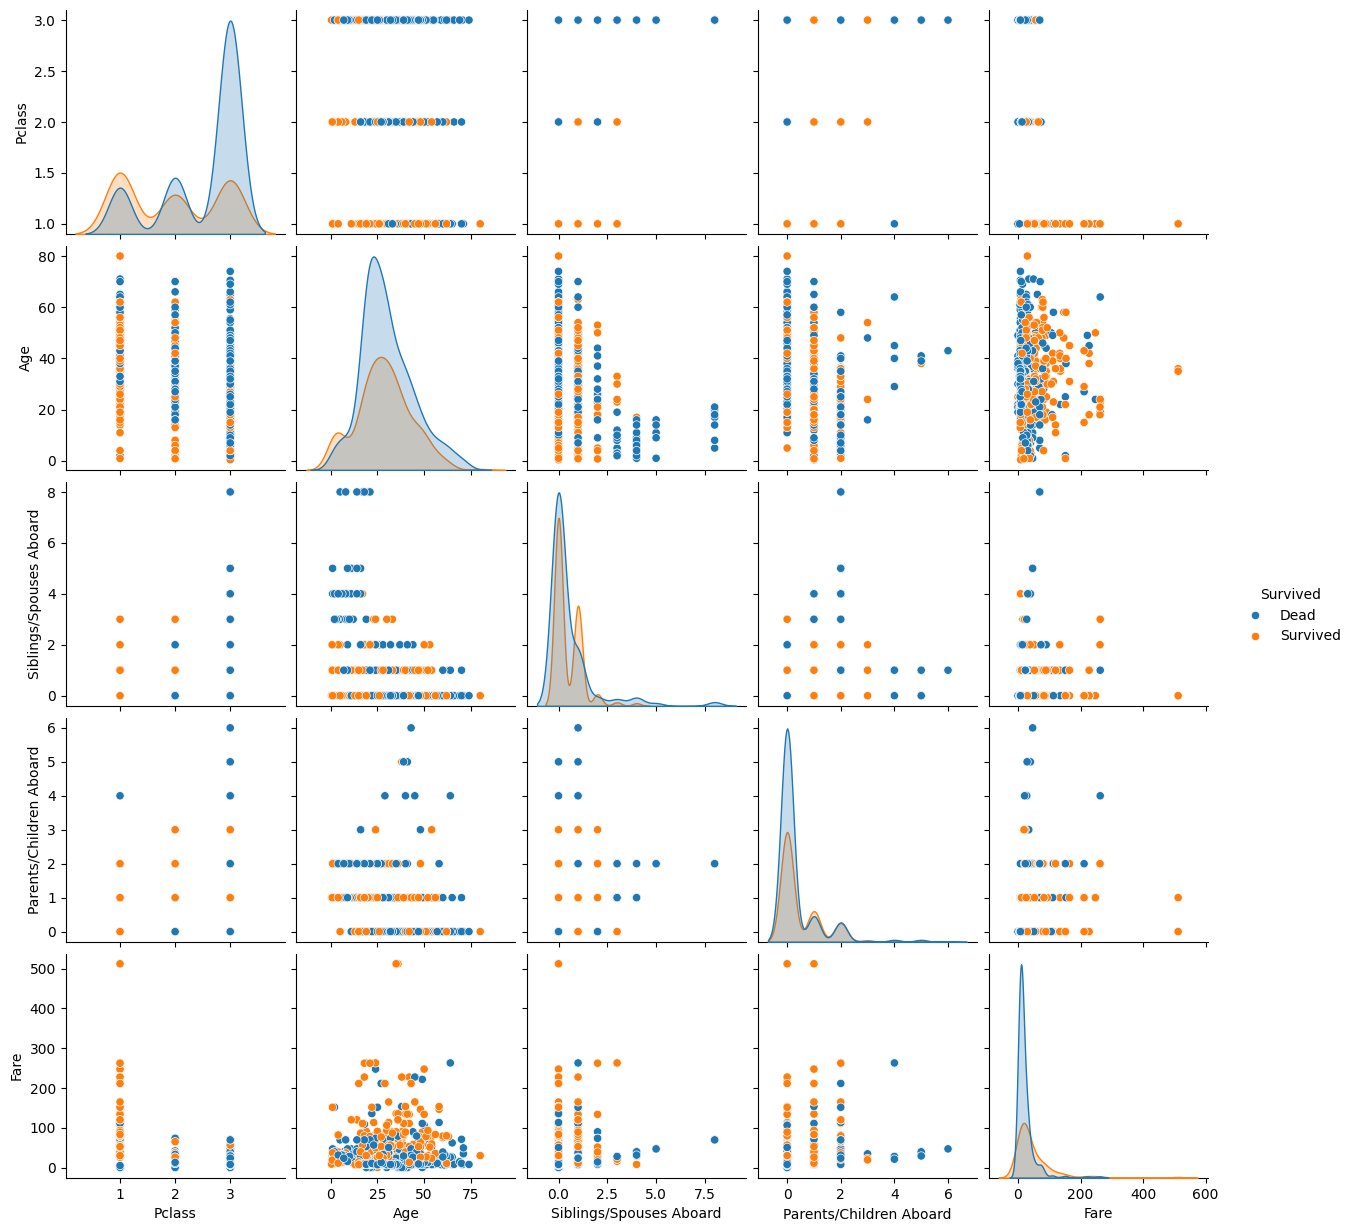

In [28]:
# Print the data types of each column
print(df_titanic.dtypes)

# Create a pairplot of the numeric columns
sns.pairplot(df_titanic, hue='Survived')

# Create a heatmap of the correlation matrix
#corr = df_titanic.corr()
#sns.heatmap(corr, annot=True)


You are looking for Jack. How many people named Jack on board?

In [29]:
jack_count = df_titanic['Name'].str.contains('Jack').sum()
print(f"There are {jack_count} people named Jack on board.")


There are 1 people named Jack on board.


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Select features (X) with only numeric values, and without "Survived" column
X = df_titanic[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df_titanic['Survived']

# Split your data with random_state = 36
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

# Train a logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Print the accuracy score on the train set and on the test set
print("Accuracy on train set:", logreg.score(X_train, y_train))
print("Accuracy on test set:", logreg.score(X_test, y_test))

# Print the Confusion Matrix on the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg.predict(X_test)))

# How many iterations were needed to train this model?
print("Number of iterations:", logreg.n_iter_)


Accuracy on train set: 0.718796992481203
Accuracy on test set: 0.6441441441441441
Confusion Matrix:
[[109  20]
 [ 59  34]]
Number of iterations: [55]


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [31]:

# Change the weight of the classes
weights = {
  "Survived": 0.1,
  "Dead": 1,
}

# Fit the model on train set
logreg = LogisticRegression(class_weight=weights)
logreg.fit(X_train, y_train)

# Print the accuracy score on the train set and on the test set
print("Accuracy on train set:", logreg.score(X_train, y_train))
print("Accuracy on test set:", logreg.score(X_test, y_test))

# Print the Confusion Matrix on the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg.predict(X_test)))


Accuracy on train set: 0.631578947368421
Accuracy on test set: 0.5900900900900901
Confusion Matrix:
[[129   0]
 [ 91   2]]


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [32]:
predictions = logreg.predict_proba(X_test)
survived_prob = predictions[:, 1]
sorted_passengers = df_titanic.iloc[np.argsort(-survived_prob)]
print(sorted_passengers[['Name', 'Survived', 'Pclass', 'Age', 'Fare']])


                               Name  Survived  Pclass   Age     Fare
34           Mr. Edgar Joseph Meyer      Dead       1  28.0  82.1708
67   Miss. Erna Alexandra Andersson  Survived       3  17.0   7.9250
73                     Mr. Lee Bing  Survived       3  32.0  56.4958
123      Mr. Percival Wayland White      Dead       1  54.0  77.2875
203               Mr. Gurshon Cohen  Survived       3  18.0   8.0500
..                              ...       ...     ...   ...      ...
179     Miss. Constance Gladys Sage      Dead       3   8.0  69.5500
198           Miss. Henriette Yrois      Dead       2  24.0  13.0000
134               Mr. Emile Richard      Dead       2  23.0  15.0458
126        Mr. Fridtjof Arne Madsen  Survived       3  24.0   7.1417
197          Miss. Margaret Madigan  Survived       3  21.0   7.7500

[222 rows x 5 columns]


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [33]:
# Select the 120 people with the highest probability of dying
highest_risk_passengers = sorted_passengers.iloc[:120]

# Count the number of people who actually survived
survivors_in_risk_group = highest_risk_passengers['Survived'].value_counts().get('Survived', 0)

print(f"Number of survivors in the highest risk group: {survivors_in_risk_group}")


Number of survivors in the highest risk group: 41


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [34]:
# Reverend "Rev. Juozas Montvila" and "Mrs. William (Margaret Norton) Rice"
people = ['Rev. Juozas Montvila', 'Mrs. William (Margaret Norton) Rice']
X_people = df_titanic[df_titanic['Name'].isin(people)][X.columns]

# Make a prediction with probability for this 2 people
predictions = logreg.predict_proba(X_people)

# Which one has a better chance to survive?
survived_prob = predictions[:, 1]
for name, prob in zip(people, survived_prob):
  print(f"{name}: {prob:.2f}")

# Reverend "Rev. Juozas Montvila" has a better chance of survival


Rev. Juozas Montvila: 0.06
Mrs. William (Margaret Norton) Rice: 0.08
